I'll use this notebook to set up some geo plotting tools to potentially use later to display and investigate the geographical points and geographical time series in the data.

# Setup

In [7]:
import numpy as np
import sklearn
import pandas as pd
import os
import zipfile

In [2]:
# Set up some directory info, and figure export path
PROJECT_ROOT_DIR = '../../../'
NOTEBOOK_ID = 'Geo_Data'
FIGURE_EXPORT_PATH = os.path.join(PROJECT_ROOT_DIR, "analyses/team04/mg/figures", NOTEBOOK_ID)
os.makedirs(FIGURE_EXPORT_PATH, exist_ok = True)

In [3]:
# Define figure export
def save_fig(fig_id, tight_layout=True, fig_extension = "png", resolution = 300):
    path = os.path.join(FIGURE_EXPORT_PATH, fig_id + '.' + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format = fig_extension, dpi = resolution)

In [4]:
# Set up some plotting conveniences/settings
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [8]:
# load SEP data
DATA_PATH = os.path.join(PROJECT_ROOT_DIR, "data/data.zip")
data = zipfile.ZipFile(DATA_PATH)    
pp_sep_site_exchanges = pd.read_csv(data.open(r'data/pp_sep_site_exchanges.csv', pwd = b'*$1Y5.2,|sG$'))
pp_sep_site_participants = pd.read_csv(data.open(r'data/pp_sep_site_participants.csv', pwd = b'*$1Y5.2,|sG$'))

In [9]:
# Load site lat/lon data
updated_lat_lon_path = os.path.join(PROJECT_ROOT_DIR, "analyses/team04/mg/data/sep_site_outrigger_LATLON_updated.csv")
lat_lon = pd.read_csv(updated_lat_lon_path)

In [ ]:
# Google maps appproach

# Need to obtain googlemaps api key  and set up billing info to proceed with this :/
'''
# Let's investigate these locations on a map using gmplot:

import gmplot
gmap = gmplot.GoogleMapPlotter(39.960957,-75.174247, 13)
gmap.scatter(lats, lons, 'k', marker=True)
gmap.draw('SEP_site_locations.html')


'''

In [11]:
# Let's try an opensource shapefile with geopandas instead:
import geopandas
from shapely.geometry import Point, Polygon

# Shape file from Azavea
philly_neighborhoods = geopandas.read_file("data/Neighborhoods_Philadelphia/Neighborhoods_Philadelphia.shp")

In [15]:
# Check out shape file and crs
philly_neighborhoods.head(5)
philly_neighborhoods.crs

{'init': 'epsg:2272'}

In [22]:
# Let's convert the crs to the same system in which our data is recorded:
philly_neighborhoods = philly_neighborhoods.to_crs({'init': 'epsg:4326'})
philly_neighborhoods.crs

{'init': 'epsg:4326'}

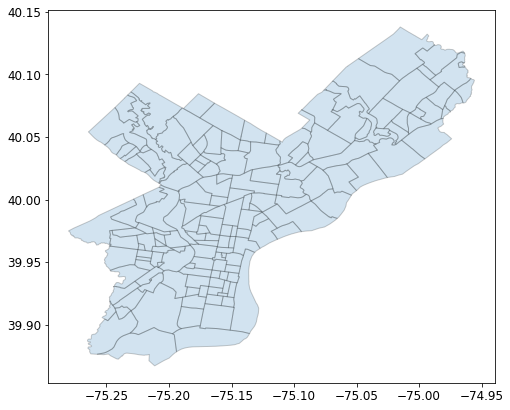

In [23]:
# background map for future plotting
background_ax = philly_neighborhoods.plot(figsize = (8,8), alpha  = .2, edgecolor = 'k')

In [27]:
# Pull lat/lons from site locations
site_locations = zip(lat_lon["Lat"], lat_lon["Lon"])
# Not sure where the swap occurred, but for some reason I need to flip lats/longs here to get the crs's to match up below.
geometry = [Point(y,x) for (x,y) in site_locations]
# Set crs:
crs = {'init': 'epsg:4326'}
# Construct geopandas lat/lon dataframe
geo_lat_lon = geopandas.GeoDataFrame(lat_lon, crs= crs, geometry = geometry)

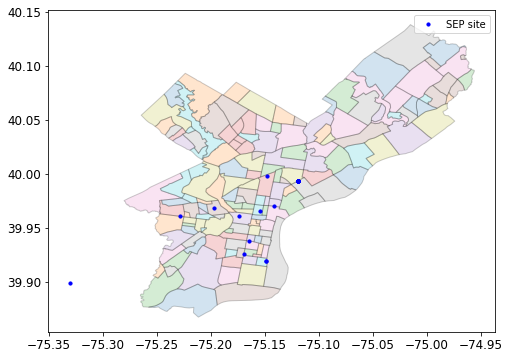

In [30]:
# Plot site locations over Philly:
fig, ax = plt.subplots(figsize = (8,8))
philly_neighborhoods.plot(column = "LISTNAME", ax = ax, alpha  = .2, edgecolor = 'k', cmap = None)
geo_lat_lon.plot(ax = ax, markersize = 10, color = 'blue', marker = 'o', label = "SEP site")
plt.legend()